In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib import rcParams
import numpy as np
from highlight_text import fig_text
import pandas as pd

from PIL import Image
import urllib
import os

# Data from League of Ireland Premier 2022

In [2]:
df = pd.read_csv(r"C:\\Users\josep\Downloads\Expected goals of LOI clubs for 2022 season.csv")
# Reads in data 
# Goals scored provided by https://www.extratime.com/leagues/
# Expected Goals provided by https://footystats.org/republic-of-ireland/premier-division/xg#

In [3]:
df

,Unnamed: 0,team_id,team_name,variable,value
0,19,1627,Finn Harps,xG_ag,40
1,18,1627,Finn Harps,score_ag,33
2,17,1578,UCD,xG_ag,31
3,16,1578,UCD,score_ag,28
4,15,8339,Drogheda United,xG_ag,42
5,14,8339,Drogheda United,score_ag,34
6,13,5751,Shelbourne,xG_ag,35
7,12,5751,Shelbourne,score_ag,40
8,11,4594,Bohemians,xG_ag,54
9,10,4594,Bohemians,score_ag,45


# Visualisation of Rolling Expected Goals Plot

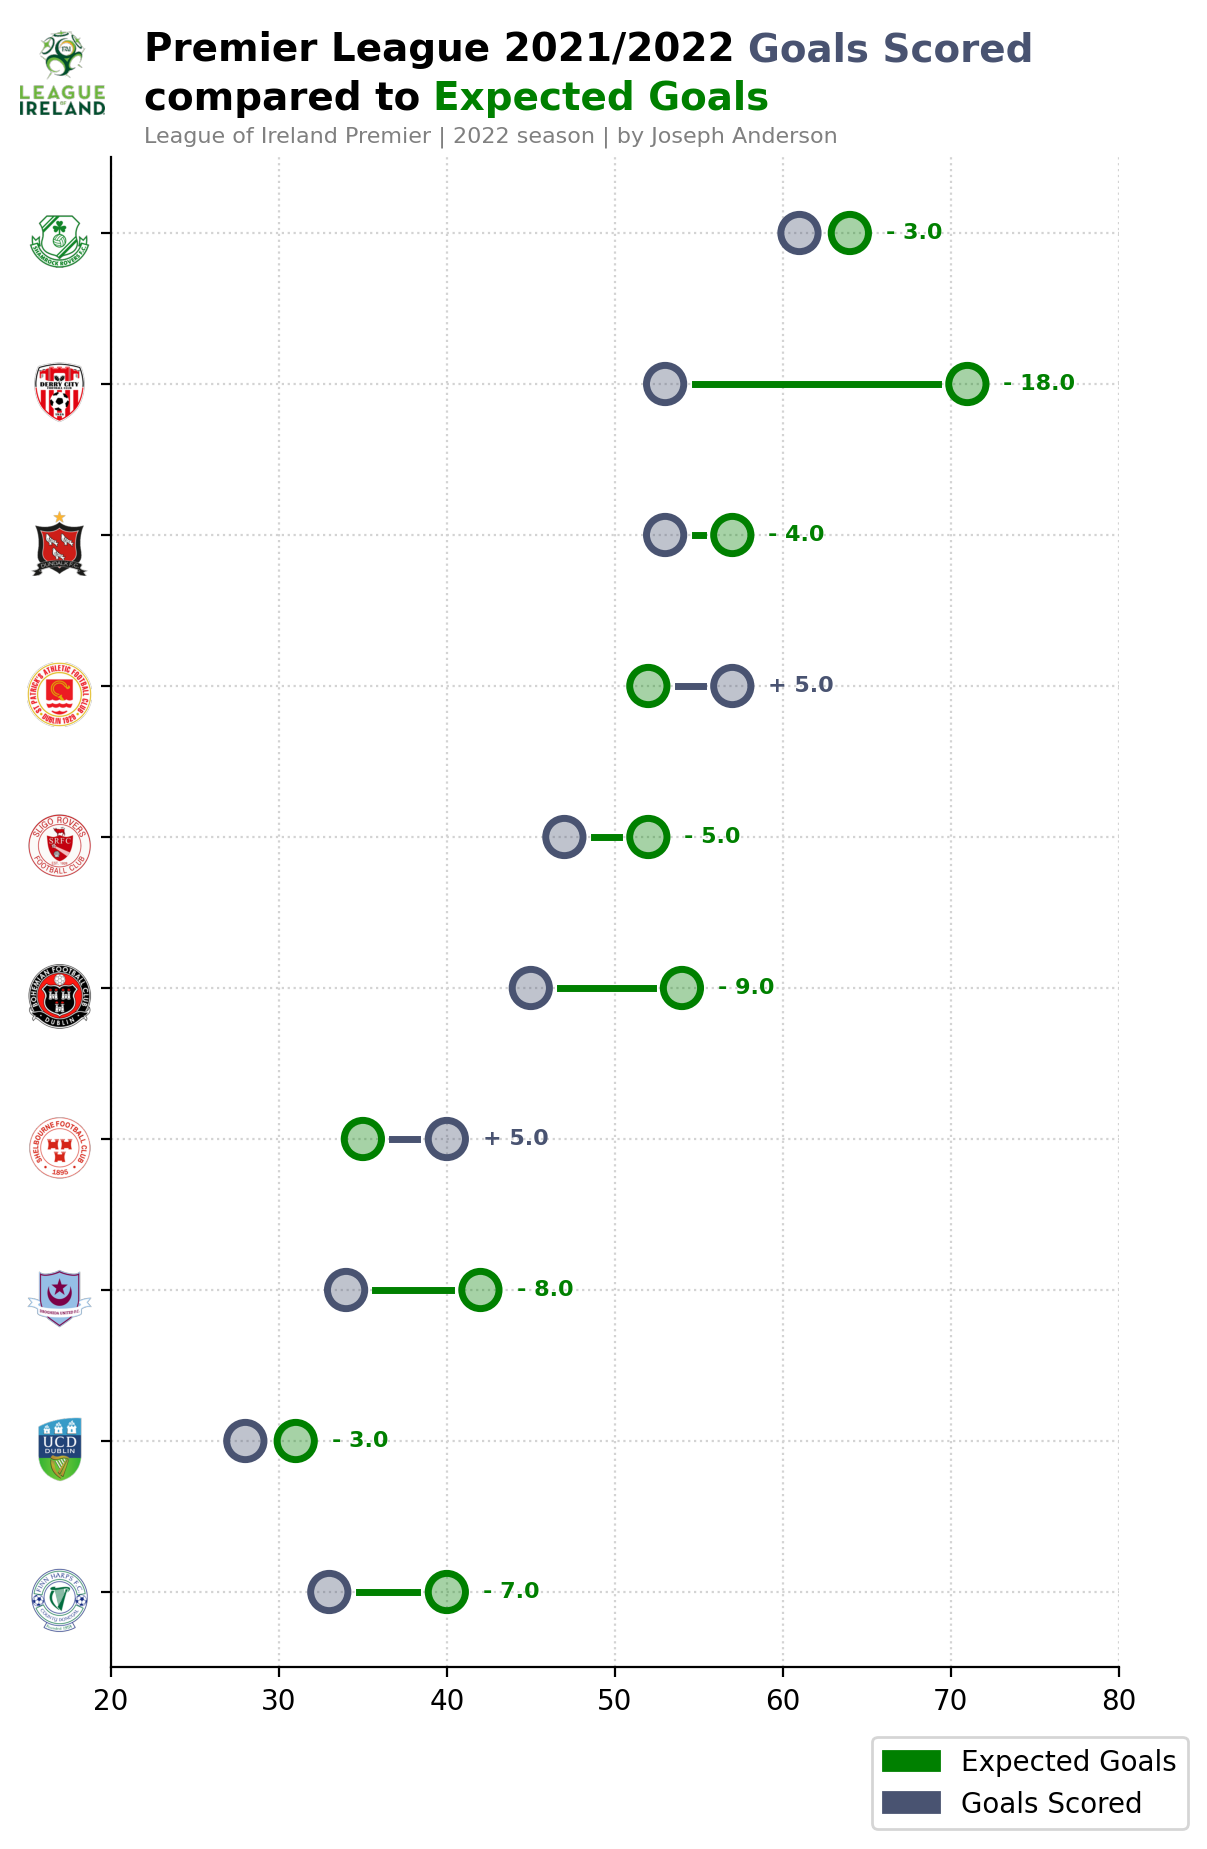

In [19]:
fig = plt.figure(figsize=(6.5, 10), dpi = 200)
ax = plt.subplot(111)

# Adjust spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, color = "lightgrey", ls = ":")

# Define the series
teams = list(df["team_id"].unique())
Y = np.arange(len(teams))
X_xg = df[df["variable"] == "xG_ag"]["value"]
X_goals = df[df["variable"] == "score_ag"]["value"]

# Fix axes limits
ax.set_ylim(-.5, len(teams) - .5)
ax.set_xlim(min(X_goals.min(), X_xg.min(), 20), max(X_goals.max(), X_xg.max(), 80))

# Scatter plots
ax.scatter(X_xg, Y, color = "g", s = 150, alpha = 0.35, zorder = 3)
ax.scatter(X_goals, Y, color = "#495371", s = 150, alpha = 0.35, zorder = 3)
ax.scatter(X_xg, Y, color = "none", ec = "g", s = 180, lw = 2.5, zorder = 3)
ax.scatter(X_goals, Y, color = "none", ec = "#495371", s = 180, lw = 2.5, zorder = 3)

# Add line chart between points and difference annotation
for index in Y:
    difference = X_xg.iloc[index] - X_goals.iloc[index]
    if difference > 0:
        color = "g" 
        x_adj = -1.75
        anot_position = X_xg.iloc[index]
        anot_aux_sign = "-"
    else:
        color = "#495371"
        x_adj = 1.75
        anot_position = X_goals.iloc[index]
        anot_aux_sign = "+"
    
    ax.annotate(
        xy = (anot_position, index),
        text = f"{anot_aux_sign} {abs(difference):.1f}",
        xytext = (13, -2),
        textcoords = "offset points",
        size = 8,
        color = color,
        weight = "bold"
    )
    
    # line in between points 
    if abs(difference) < 3.5:
        continue
    ax.plot(
        [X_xg.iloc[index] + x_adj, X_goals.iloc[index] + x_adj*(-1)],
        [index, index],
        lw = 2.5,
        color = color,
        zorder = 2
    )


DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

# Remove tick labels
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
false_ticks = ax.set_yticklabels([])

fig_text(x = 0.15, y = .9, s = "Premier League 2021/2022 <Goals Scored> \ncompared to <Expected Goals> ",highlight_textprops = [
        {"color": "#495371"},{"color":"g"}],va = "bottom", ha = "left",fontsize = 14, color = "black", 
         font = "DM Sans", weight = "bold")

fig_text(x = 0.15, y = .885, s = "League of Ireland Premier | 2022 season | by Joseph Anderson",va = "bottom", ha = "left",
         fontsize = 8, color = "grey", font = "Karla")

# # ---- The League's logo
league_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/218.png"))
league_ax = fig.add_axes([0.055, 0.89, 0.065, 0.065], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# Runs through each saved image ID and adds it to the plot
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, team_id in enumerate(teams):
    ax_coords = DC_to_NFC([15, index - 0.39])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "C")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")) #.convert("LA")  would turn logos light grey 
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    
# where some data has already been plotted to ax
handles, labels = ax.get_legend_handles_labels()

# manually define a new patch 
patch1 = mpatches.Patch(color='g', label='Expected Goals')
patch2 = mpatches.Patch(color='#495371', label='Goals Scored')

# handles is a list, so append manual patch
handles.append(patch1) 
handles.append(patch2)

# plot the legend

plt.legend(handles= handles, bbox_to_anchor=(13, -22.5), loc='upper left', borderaxespad=0)

# Analysiation of the Plot

We can see that only 2 teams ended up outscoring their expected goals - St Patricks Athletic and Shelbourne. The rest of the 10 teams underscored their expected goals. 

**Expected Goals (xG)** is a metric used to calulate the probability of a scoring opportunity resulting in a goal. A shot that has an xG of 0.01 suggests it is expected that the shot results in a goal 1 time out of 100 - so it's very unlikely that it results in a goal. The expected goals for a penalty at the professional level is 0.75 meaning that 3 times out of 4 a professional footballer will score the penalty. Lots of context is taken into account, such as the position from which the shot was taken, the body part that was used, the type of pass that set the chance up, the phase of play (counter-attack, set-piece, open play etc.), and the positions of the opponents.

Therefore, each team is expected to score a certain number of goals based on the probability of each scoring opportunity they create.  

### Outperforming xG
Both St Pats and Shelbourne outscored their expected goals. Outperforming an xG over a sustained period of time suggests that they have a particularly good finishing ability. However, over a shorter period of time it may suggest that the team is going through a purple patch due to high confidence or a change in manager. When their run of form is over their goals scored will decrease relative to their xG. 

Great players consistently outperform their xG. One example of this is **Mo Salah** who has consistently outperformed his expected goals in the Premier League which is an indication of an elite finising ability.
 
| Season    | xG                 | Goals Scored |
| ------    | -------------------| ------------ |
| 17/18     |     24.1          |     32       |
| 18/19     |     20.2          |     22       |
| 19/20     |     19.0          |     19       |
| 20/21     |     19.3          |     22       |
| 21/22     |     23.7          |     23       |





### Underperforming xG
When a tean underscores their xG it means they have been wasteful in the chances they have been creating. Their finishing abilities will need to improve. For plenty of players and teams it will not last and soon they should start to score at a more consistent rate.

One famous example was Brighton from 2018 - 2021 consistently underscored their xG due to a lack of a quality forward (See https://github.com/joeyanderson1/Football-Data-Analysis/blob/main/Brighton%20Goal%20Problem.ipynb). 

From the above graphic above one outlier clearly sticks out - Derry City. They underperformed their expected goals massively so they should have done significantly better in the league which is demonstrated by the xPoints table which gives us an indication of where each team should have come in the league. 



### Limitation of Expected Goals 
Expected goals can give a skewed view of how a team performs. Expected goals doesn't account for individual players and their relative abilities in comparison. 

